# Exercise: "Human learning" with iris data

**Question:** Can you predict the species of an iris using petal and sepal measurements?

1. Read the iris data into a Pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use sorting, split-apply-combine, and/or visualization to look for differences between species.
4. Write down a set of rules that could be used to predict species based on iris measurements.

**BONUS:** Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data, and check the accuracy of your predictions.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Task 1

Read the iris data into a pandas DataFrame, including column names.

In [3]:
# define a list of column names (as strings)
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# define the URL from which to retrieve the data (as a string)
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# retrieve the CSV file and add the column names
iris = pd.read_csv(url, header=None, names=col_names)

## Task 2

Gather some basic information about the data.

In [4]:
# observe first five rows of data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 5)

In [5]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [8]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Task 3

Use sorting, split-apply-combine, and/or visualization to look for differences between species.

### sorting

In [23]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
# sort the DataFrame by petal_width
iris.sort_values(by='petal_width', ascending=True, inplace=True)

In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
32,5.2,4.1,1.5,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa


In [28]:
# sort the DataFrame by petal_width and display the NumPy array
iris.sort_values(by='petal_width', ascending=True).values[0:5]

array([[5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa']], dtype=object)

### split-apply-combine

In [32]:
# mean of sepal_length grouped by species
iris.groupby(by='species', axis=0).sepal_length.mean()

species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64

In [11]:
# mean of all numeric columns grouped by species
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [12]:
# description of all numeric columns grouped by species
iris.groupby('species').describe()

petal_length  petal_width  sepal_length  sepal_width
species                                                                    
Iris-setosa     count     50.000000    50.000000     50.000000    50.000000
                mean       1.464000     0.244000      5.006000     3.418000
                std        0.173511     0.107210      0.352490     0.381024
                min        1.000000     0.100000      4.300000     2.300000
                25%        1.400000     0.200000      4.800000     3.125000
                50%        1.500000     0.200000      5.000000     3.400000
                75%        1.575000     0.300000      5.200000     3.675000
                max        1.900000     0.600000      5.800000     4.400000
Iris-versicolor count     50.000000    50.000000     50.000000    50.000000
                mean       4.260000     1.326000      5.936000     2.770000
                std        0.469911     0.197753      0.516171     0.313798
                min        3.000000     1.000000      4.900000     2.000000
                25%        4.000000     1.200000      5.600000     2.525000
                50%        4.350000     1.300000      5.900000     2.800000
                75%        4.600000     1.500000      6.300000     3.000000
                max        5.100000     1.800000      7.000000     3.400000
Iris-virginica  count     50.000000    50.000000     50.000000    50.000000
                mean       5.552000     2.026000      6.588000     2.974000
                std        0.551895     0.274650      0.635880     0.322497
                min        4.500000     1.400000      4.900000     2.200000
                25%        5.100000     1.800000      6.225000     2.800000
                50%        5.550000     2.000000      6.500000     3.000000
                75%        5.875000     2.300000      6.900000     3.175000
                max        6.900000     2.500000      7.900000     3.800000

### visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011D60CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000012319710>]], dtype=object)

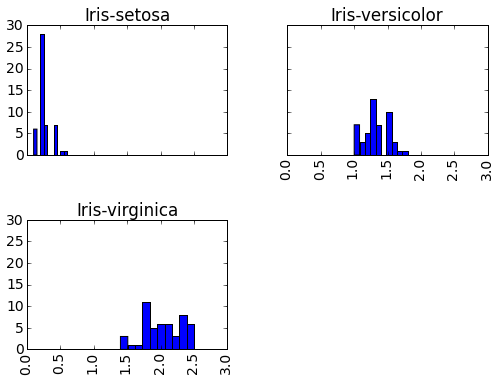

In [48]:
# histogram of petal_width grouped by species
iris.hist(column='petal_width', by='species', sharex=True, sharey=True)

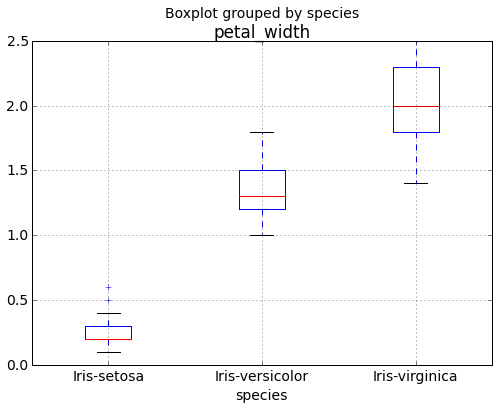

In [14]:
# box plot of petal_width grouped by species
iris.boxplot(column='petal_width', by='species')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000157406A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015A29908>]], dtype=object)

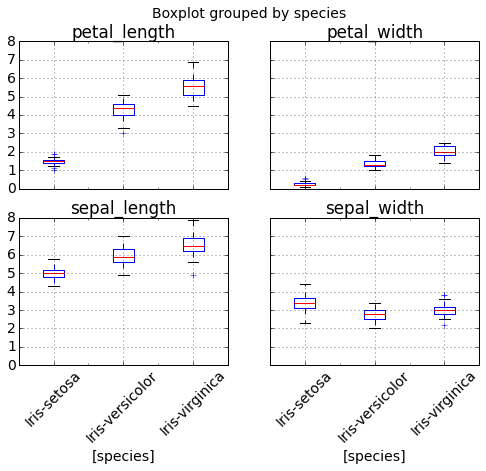

In [53]:
# box plot of all numeric columns grouped by species
iris.boxplot(by='species', rot=45)

In [16]:
# map species to a numeric value so that plots can be colored by species
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# alternative method
iris['species_num'] = iris.species.factorize()[0]

In [60]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
13,4.3,3.0,1.1,0.1,Iris-setosa,0
12,4.8,3.0,1.4,0.1,Iris-setosa,0
37,4.9,3.1,1.5,0.1,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0
34,4.9,3.1,1.5,0.1,Iris-setosa,0


c:\Users\alsherman\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


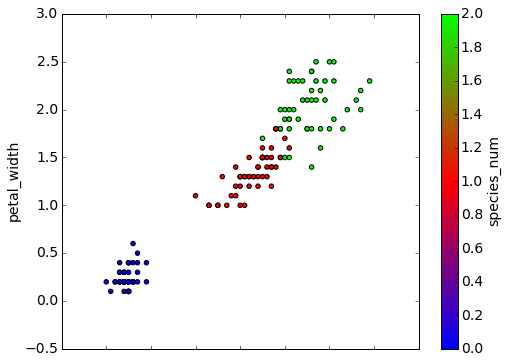

In [62]:
# scatter plot of petal_length vs petal_width colored by species
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D60CC18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EF85AC8>]], dtype=object)

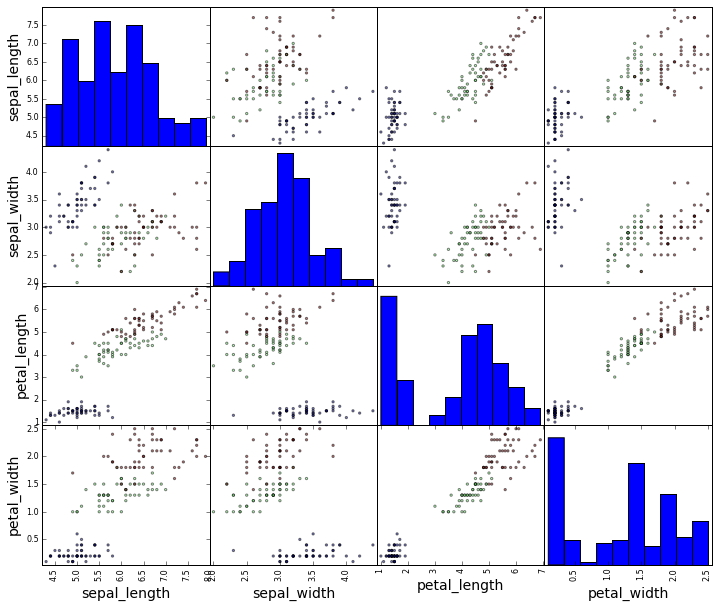

In [18]:
# scatter matrix of all features colored by species
pd.scatter_matrix(iris.drop('species_num', axis=1), c=iris.species_num, figsize=(12, 10))

## Task 4

Write down a set of rules that could be used to predict species based on iris measurements.

In [63]:
# define a new feature that represents petal area ("feature engineering")
iris['petal_area'] = iris.petal_length * iris.petal_width

In [67]:
# description of petal_area grouped by species
iris.groupby('species').petal_area.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50,0.3628,0.183248,0.11,0.2650,0.300,0.42,0.96
Iris-versicolor,50,5.7204,1.368403,3.30,4.8600,5.615,6.75,8.64
Iris-virginica,50,11.2962,2.157412,7.50,9.7175,11.445,12.79,15.87


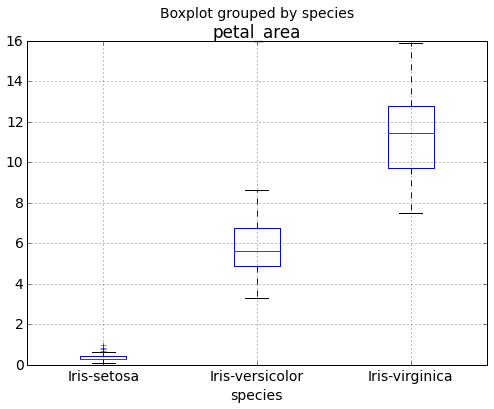

In [21]:
# box plot of petal_area grouped by species
iris.boxplot(column='petal_area', by='species')

In [22]:
# only show irises with a petal_area between 7 and 9
iris[(iris.petal_area > 7) & (iris.petal_area < 9)].sort('petal_area')

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area
86,6.7,3.1,4.7,1.5,Iris-versicolor,1,7.05
85,6.0,3.4,4.5,1.6,Iris-versicolor,1,7.20
52,6.9,3.1,4.9,1.5,Iris-versicolor,1,7.35
72,6.3,2.5,4.9,1.5,Iris-versicolor,1,7.35
119,6.0,2.2,5.0,1.5,Iris-virginica,2,7.50
56,6.3,3.3,4.7,1.6,Iris-versicolor,1,7.52
106,4.9,2.5,4.5,1.7,Iris-virginica,2,7.65
133,6.3,2.8,5.1,1.5,Iris-virginica,2,7.65
134,6.1,2.6,5.6,1.4,Iris-virginica,2,7.84
83,6.0,2.7,5.1,1.6,Iris-versicolor,1,8.16


My set of rules for predicting species:

- If petal_area is less than 2, predict **setosa**.
- Else if petal_area is less than 7.4, predict **versicolor**.
- Otherwise, predict **virginica**.

## Bonus

Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data, and check the accuracy of your predictions.